In [1]:
# =====================================================================================
# PROBLEM A2
#
# Build a Neural Network Model for Horse or Human Dataset.
# The test will expect it to classify binary classes.
# Your input layer should accept 150x150 with 3 bytes color as the input shape.
# Don't use lambda layers in your model.
#
# The dataset used in this problem is created by Laurence Moroney (laurencemoroney.com).
#
# Desired accuracy and validation_accuracy > 83%
# ======================================================================================

In [2]:
#Check for GPU availability
import tensorflow as tf
print(tf.__version__)
tf.test.is_gpu_available()

2.13.0


2024-02-14 22:49:12.501788: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-14 22:49:12.501963: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-14 22:49:12.502002: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-14 22:49:12.502222: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-14 22:49:12.502238: I tensorflow/core/co

True

In [3]:

import urllib.request
import zipfile
import tensorflow as tf
import os
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [4]:
#const
batch_size = 32
img_height = 150
img_width = 150
AUTOTUNE = tf.data.AUTOTUNE

In [4]:
#Get Data
data_url_1 = 'https://github.com/dicodingacademy/assets/releases/download/release-horse-or-human/horse-or-human.zip'
urllib.request.urlretrieve(data_url_1, 'horse-or-human.zip')
local_file = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('data/horse-or-human')

data_url_2 = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/validation-horse-or-human.zip'
urllib.request.urlretrieve(data_url_2, 'validation-horse-or-human.zip')
local_file = 'validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('data/validation-horse-or-human')
zip_ref.close()

In [5]:
#Specify path for data training and validation
TRAINING_DIR = 'data/horse-or-human'
VALIDATION_DIR= 'data/validation-horse-or-human'

In [6]:
#Image augmentatiom
train_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=5,  # rotation
                                width_shift_range=0.2,  # horizontal shift
                                zoom_range=0.2,  # zoom
                                horizontal_flip=True,  # horizontal flip
                                brightness_range=[0.2,0.8])  # brightness

val_datagen=ImageDataGenerator(rescale=1./255)

In [7]:
train_gen= train_datagen.flow_from_directory(
    directory=TRAINING_DIR,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_gen= val_datagen.flow_from_directory(
    directory=VALIDATION_DIR,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [8]:
#get classes name
targets=list(val_gen.class_indices.keys())

Text(2, 10, 'humans')

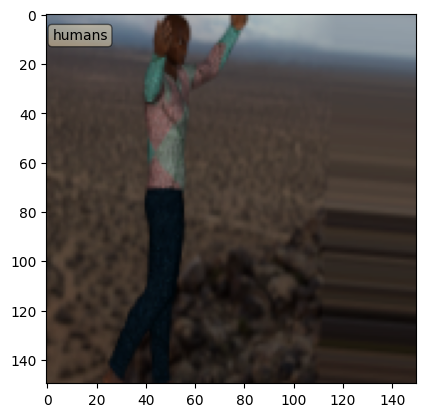

In [9]:
yessir=next(iter(train_gen))
plt.imshow(yessir[0][0])
plt.text(2,10, targets[int(yessir[1][0])], bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

In [14]:
# Only get target i think!
class mycustomcallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super(mycustomcallback, self).__init__()
        
    ## Desired accuracy and validation_accuracy > 83%, will stop epoch after the desired are reached
    def on_epoch_end(self, epoch, logs=None):
        logtrain, logval = logs["accuracy"], logs["val_accuracy"]
        if logtrain > 0.83 and logval> 0.83:
            self.model.stop_training = True

In [12]:
#The model
def getmodel():
    model=tf.keras.models.Sequential([
        ##Conv layer 1
        tf.keras.layers.Conv2D(32, kernel_size=3, input_shape=train_gen.image_shape),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        
        ##Conv layer 2
        tf.keras.layers.Conv2D(64, kernel_size=3),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        
        ##Conv layer 3
        tf.keras.layers.Conv2D(128, kernel_size=3),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        
        ##flatten and normal dense
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer="RMSprop", loss=tf.keras.losses.binary_crossentropy, metrics="accuracy")
    
    return model

In [15]:
model=getmodel()
model.fit(train_gen, validation_data=val_gen, batch_size=batch_size, epochs=100, callbacks=mycustomcallback())

Epoch 1/100


2024-02-12 17:42:27.442222: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


33/33 [==============================] - 11s 284ms/step - loss: 1.7586 - accuracy: 0.5706 - val_loss: 1.6750 - val_accuracy: 0.5000
Epoch 2/100
33/33 [==============================] - 10s 303ms/step - loss: 0.6458 - accuracy: 0.6650 - val_loss: 1.5566 - val_accuracy: 0.5000
Epoch 3/100
33/33 [==============================] - 9s 267ms/step - loss: 0.5513 - accuracy: 0.7322 - val_loss: 1.4653 - val_accuracy: 0.5898
Epoch 4/100
33/33 [==============================] - 9s 265ms/step - loss: 0.5364 - accuracy: 0.7537 - val_loss: 2.7109 - val_accuracy: 0.6250
Epoch 5/100
33/33 [==============================] - 9s 279ms/step - loss: 0.4138 - accuracy: 0.8179 - val_loss: 4.2308 - val_accuracy: 0.6484
Epoch 6/100
33/33 [==============================] - 9s 277ms/step - loss: 0.3591 - accuracy: 0.8520 - val_loss: 4.0576 - val_accuracy: 0.6445
Epoch 7/100
33/33 [==============================] - 9s 285ms/step - loss: 0.2628 - accuracy: 0.8958 - val_loss: 4.9473 - val_accuracy: 0.6406
Epoch 8/1

Text(0.5, 0, 'Epochs')

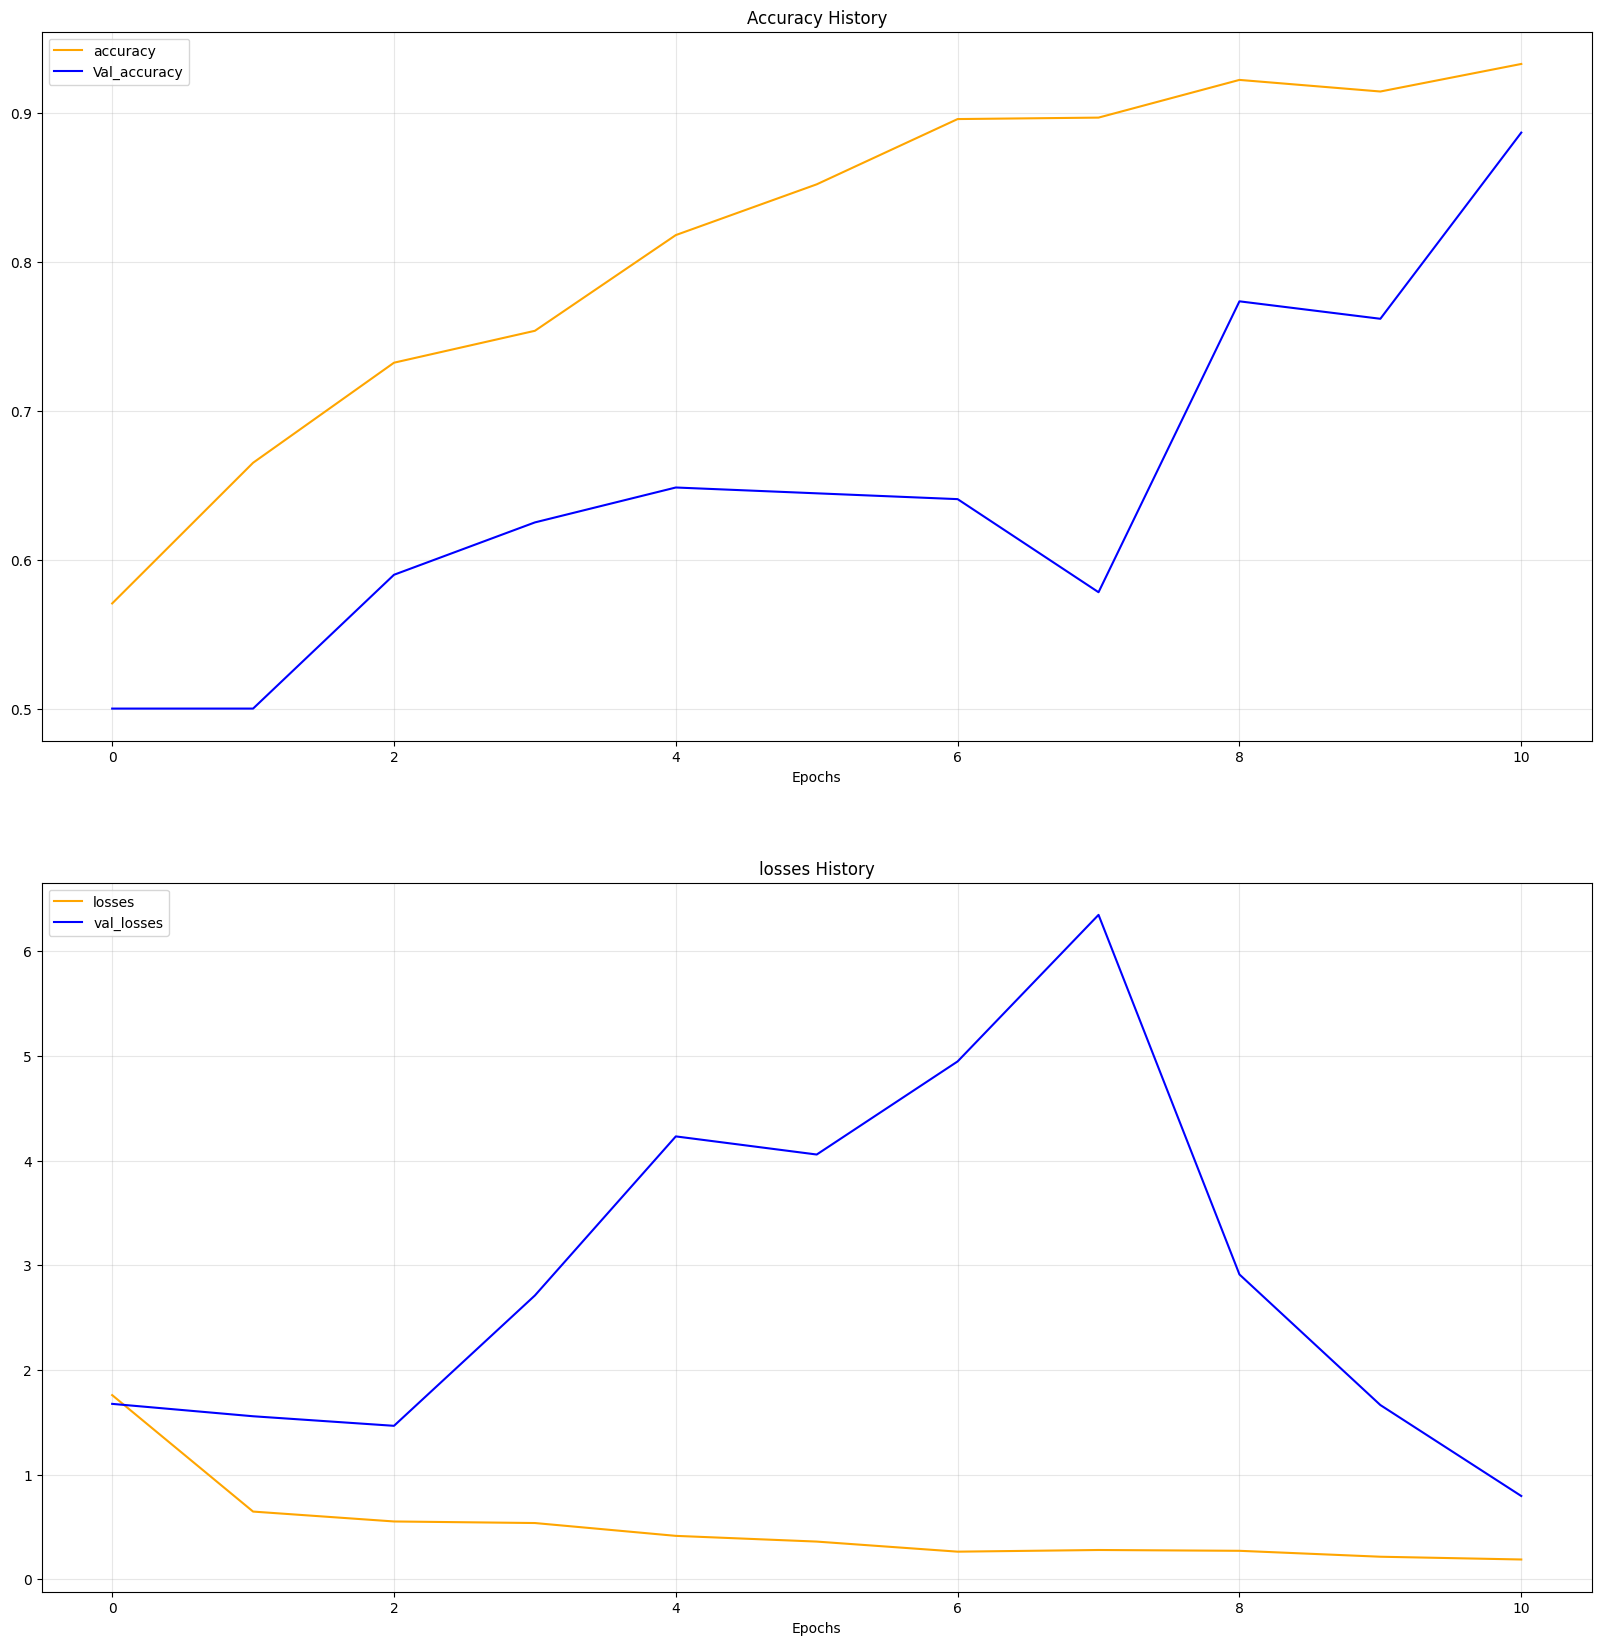

In [32]:
#Check for history of the training
history=model.history.history
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(bottom = 0.1)
ax = fig.add_subplot(2, 1, 1)
ax.set_title("Accuracy History")
ax.plot(history["accuracy"], c="orange", label="accuracy")
ax.plot(history["val_accuracy"], c="blue", label="Val_accuracy")
ax.legend(loc="upper left")
ax.set_xlabel("Epochs")
ax.grid("on", alpha=0.3)

ax = fig.add_subplot(2, 1, 2)
ax.set_title("losses History")
ax.plot(history["loss"], c="orange", label="losses")
ax.plot(history["val_loss"], c="blue", label="val_losses")
ax.legend(loc="upper left")
ax.grid("on", alpha=0.3)
ax.set_xlabel("Epochs")

In [33]:
model.save("TheModel/model_A2.h5")

/root/miniconda3/envs/tf/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Full answer for the problem!

In [34]:
# =====================================================================================
# PROBLEM A2
#
# Build a Neural Network Model for Horse or Human Dataset.
# The test will expect it to classify binary classes.
# Your input layer should accept 150x150 with 3 bytes color as the input shape.
# Don't use lambda layers in your model.
#
# The dataset used in this problem is created by Laurence Moroney (laurencemoroney.com).
#
# Desired accuracy and validation_accuracy > 83%
# ======================================================================================

import urllib.request
import zipfile
import tensorflow as tf
import os
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop


def solution_A2():
    
    #Don't change these lines!
    data_url_1 = 'https://github.com/dicodingacademy/assets/releases/download/release-horse-or-human/horse-or-human.zip'
    urllib.request.urlretrieve(data_url_1, 'horse-or-human.zip')
    local_file = 'horse-or-human.zip'
    zip_ref = zipfile.ZipFile(local_file, 'r')
    zip_ref.extractall('data/horse-or-human')

    data_url_2 = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/validation-horse-or-human.zip'
    urllib.request.urlretrieve(data_url_2, 'validation-horse-or-human.zip')
    local_file = 'validation-horse-or-human.zip'
    zip_ref = zipfile.ZipFile(local_file, 'r')
    zip_ref.extractall('data/validation-horse-or-human')
    zip_ref.close()
    
    #TODO: fill these lines
    ##Const
    batch_size = 32
    img_height = 150
    img_width = 150
    AUTOTUNE = tf.data.AUTOTUNE
    
    
    TRAINING_DIR = 'data/horse-or-human'
    VALIDATION_DIR= 'data/validation-horse-or-human'
    
    ##Image augmentatiom
    train_datagen=ImageDataGenerator(rescale=1./255,
                                    rotation_range=5,  # rotation
                                    width_shift_range=0.2,  # horizontal shift
                                    zoom_range=0.2,  # zoom
                                    horizontal_flip=True,  # horizontal flip
                                    brightness_range=[0.2,0.8])  # brightness
    val_datagen=ImageDataGenerator(rescale=1./255)
    
    ##Get Images from directories
    train_gen= train_datagen.flow_from_directory(
        directory=TRAINING_DIR,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary'
    )
    val_gen= val_datagen.flow_from_directory(
        directory=VALIDATION_DIR,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary'
    )
    
    ##get classes name
    targets=list(val_gen.class_indices.keys())
    

    ## A callback to only get desired target
    class mycustomcallback(tf.keras.callbacks.Callback):
        def __init__(self):
            super(mycustomcallback, self).__init__()
        ### Desired accuracy and validation_accuracy > 83%, will stop epoch after the desired are reached
        def on_epoch_end(self, epoch, logs=None):
            logtrain, logval = logs["accuracy"], logs["val_accuracy"]
            if logtrain > 0.83 and logval> 0.83:
                self.model.stop_training = True
                
    ## Function to get The model
    def getmodel():
        model=tf.keras.models.Sequential([
            
            ### Conv layer 1
            tf.keras.layers.Conv2D(32, kernel_size=3, input_shape=train_gen.image_shape),
            tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
            
            ### Conv layer 2
            tf.keras.layers.Conv2D(64, kernel_size=3),
            tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
            
            ### Conv layer 3
            tf.keras.layers.Conv2D(128, kernel_size=3),
            tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
            
            ### flatten and normal dense
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dropout(0.1),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer="RMSprop", loss=tf.keras.losses.binary_crossentropy, metrics="accuracy")
        
        return model
    
    ##Get model and train
    model=getmodel()
    model.fit(train_gen, validation_data=val_gen, batch_size=batch_size, epochs=100, callbacks=mycustomcallback())
    
    return model

# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model=solution_A2()
    model.save("TheModel/model_A2.h5")

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/100


2024-02-12 18:03:03.761164: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_7/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


33/33 [==============================] - 14s 344ms/step - loss: 1.0815 - accuracy: 0.5482 - val_loss: 1.1291 - val_accuracy: 0.5039
Epoch 2/100
33/33 [==============================] - 11s 331ms/step - loss: 0.6492 - accuracy: 0.7332 - val_loss: 3.6354 - val_accuracy: 0.5000
Epoch 3/100
33/33 [==============================] - 9s 276ms/step - loss: 0.6009 - accuracy: 0.7215 - val_loss: 2.6004 - val_accuracy: 0.5586
Epoch 4/100
33/33 [==============================] - 9s 273ms/step - loss: 0.4853 - accuracy: 0.8014 - val_loss: 7.3855 - val_accuracy: 0.5312
Epoch 5/100
33/33 [==============================] - 9s 272ms/step - loss: 0.3543 - accuracy: 0.8549 - val_loss: 2.4292 - val_accuracy: 0.7148
Epoch 6/100
33/33 [==============================] - 9s 268ms/step - loss: 0.3098 - accuracy: 0.8763 - val_loss: 3.7577 - val_accuracy: 0.6367
Epoch 7/100
33/33 [==============================] - 9s 266ms/step - loss: 0.2650 - accuracy: 0.8909 - val_loss: 4.1780 - val_accuracy: 0.6875
Epoch 8/1

/root/miniconda3/envs/tf/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
